Langchain을 통해 RAG 구성해보기


In [ ]:
!pip install -q langchain langchain-openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 636.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00


OpenAI 인증키 설정

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'your api'

Langchain : 프롬프트 + LLM

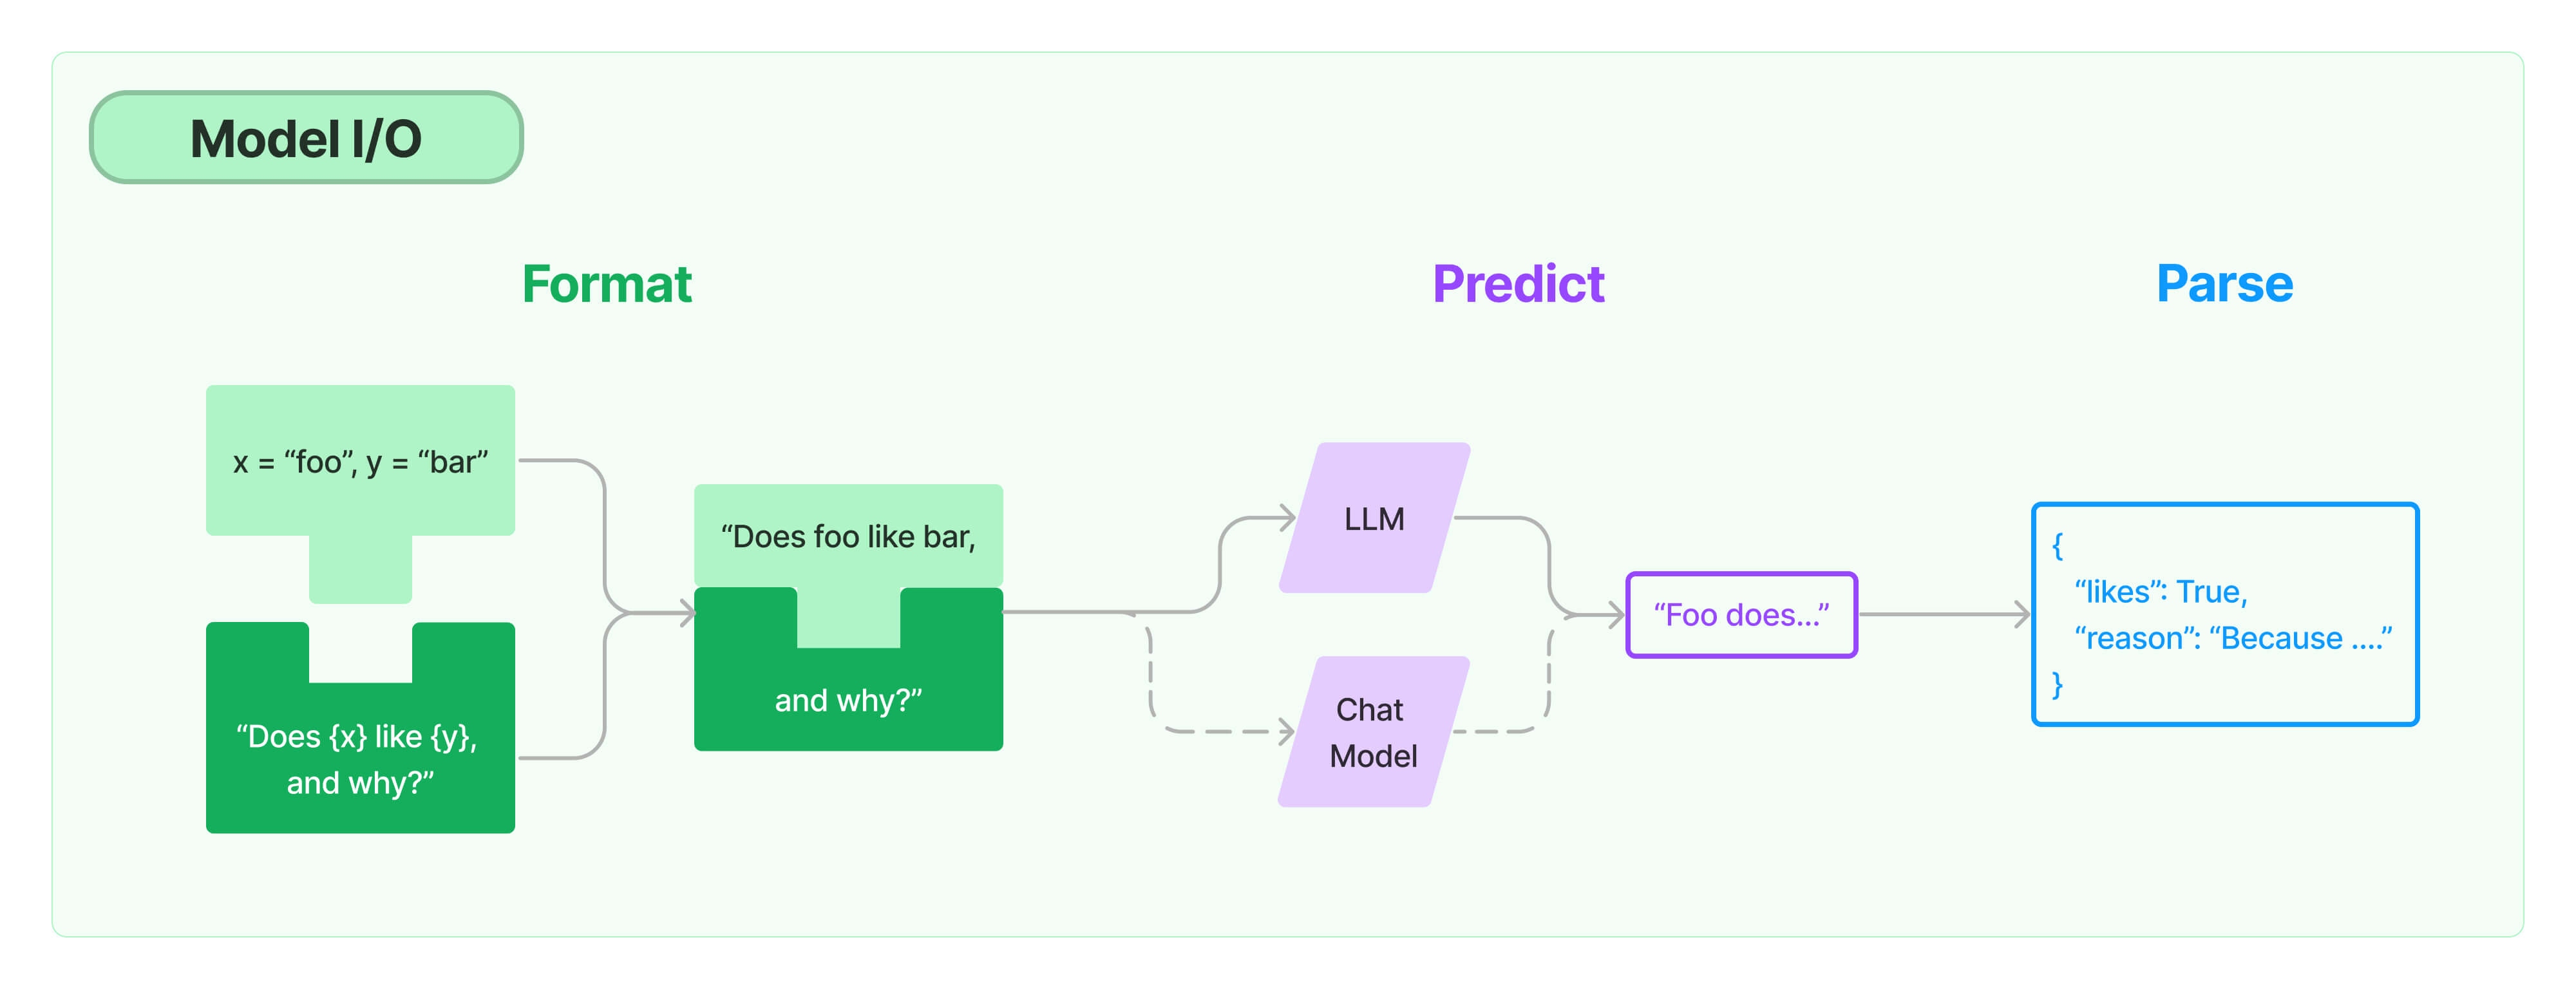

이미지 출처: https://python.langchain.com/v0.1/docs/modules/model_io/

In [ ]:
from langchain_openai import ChatOpenAI

#model
llm = ChatOpenAI(model = 'gpt-4-turbo')

#chain실행 : invoke; 입력을 LLM에 전달, 입력값에 대한 출력을 return
result = llm.invoke('지구의 자전 주기는?')

result.content

"지구의 자전 주기는 대략 24시간으로, 이 기간 동안 지구는 자기 축을 중심으로 한 바퀴를 회전합니다. 이를 통해 낮과 밤이 발생합니다. 보다 정확히는, 지구의 자전 주기는 23시간 56분 4초이며, 이를 '항성일' 또는 '별의 날'이라고 합니다. 하지만 평균적인 태양일, 즉 한 낮의 중심에서 다음 낮의 중심까지의 시간은 약 24시간입니다. 이 차이는 지구가 태양 주위를 공전하면서 동시에 자전하기 때문에 발생합니다."

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

#프롬프트+모델+아웃풋 파서
prompt = ChatPromptTemplate.from_template('You are an expert in IT-developer. Answer the question. <Question>: {input}')
llm = ChatOpenAI(model = 'gpt-4o')
output_parser = StrOutputParser()

#LCEL Chaining
chain = prompt | llm | output_parser

#chain 호출
chain.invoke({'input': 'Langchain과 LlamaIndex의 차이점은 무엇인가요?'})

'LangChain과 LlamaIndex는 둘 다 자연어 처리와 관련된 작업을 수행하기 위해 사용되는 도구이지만, 그 목적과 기능면에서 차이점이 있습니다. 아래에 그 차이점을 정리했습니다.\n\n1. **LangChain**:\n\n    - **목적**: LangChain은 주로 텍스트 생성, 변환, 분석 등을 수행할 수 있는 자연어 처리 라이브러리입니다.\n    - **기능**:\n        - 텍스트 생성 (예: GPT-3와 같은 모델을 이용한 문장 생성)\n        - 텍스트 변환 (예: 문장을 다른 형식으로 변환)\n        - 텍스트 분석 (예: 감정 분석, 주제 분류 등)\n    - **사용 사례**: 챗봇 개발, 자동 글쓰기 도구, 텍스트 요약 등 다양한 자연어 처리 작업에 활용될 수 있습니다.\n\n2. **LlamaIndex**:\n\n    - **목적**: LlamaIndex는 주로 텍스트 데이터의 인덱싱과 검색을 위해 사용되는 라이브러리입니다.\n    - **기능**:\n        - 텍스트 데이터 인덱싱 (예: 문서, 웹 페이지 등에서 중요한 정보를 추출하여 인덱스를 생성)\n        - 검색 기능 (예: 인덱스를 이용한 빠른 텍스트 검색)\n        - 데이터 관리 (예: 대용량 텍스트 데이터를 효율적으로 관리)\n    - **사용 사례**: 문서 검색 시스템, 데이터베이스 검색, 정보 검색 엔진 등에서 활용될 수 있습니다.\n\n정리하자면, LangChain은 주로 텍스트 생성과 변환에 중점을 두고 있는 반면, LlamaIndex는 텍스트 데이터의 인덱싱과 검색에 중점을 두고 있습니다. 따라서 이 두 도구는 서로 다른 목적을 위해 사용될 수 있으며, 필요에 따라 적절한 도구를 선택하는 것이 중요합니다.'

멀티체인

In [ ]:
prompt1 = ChatPromptTemplate.from_template('translates {korean_word} to English')
prompt2 = ChatPromptTemplate.from_template('explain {english_word} using oxford dictionary to me in Korean')

llm = ChatOpenAI(model = 'gpt-4o')

chain1 = prompt1 | llm | StrOutputParser()

chain1.invoke({'korean_word': '미래'})

'The Korean word "미래" translates to "future" in English.'

In [ ]:
chain2 = (
    {'english_word': chain1}
    | prompt2
    | llm
    | StrOutputParser()
)

chain2.invoke({'korean_word': '미래'})

'물론이죠! "미래"라는 한국어 단어는 영어로 "future"로 번역됩니다. 옥스포드 사전에 따르면, "future"는 다음과 같이 정의됩니다:\n\n**future (명사)**\n1. the time that will come after the present or the events that will happen then\n   - 예: We need to plan for the future.\n   \n2. a period of time following the moment of speaking or writing; time regarded as still to come\n   - 예: What will happen in the future?\n\n이 정의는 한국어로 다음과 같이 번역될 수 있습니다:\n\n**미래 (명사)**\n1. 현재 이후에 올 시간 또는 그때 일어날 사건들\n   - 예: 우리는 미래를 계획할 필요가 있다.\n   \n2. 말하거나 글을 쓰는 순간 이후의 기간; 아직 오지 않은 시간으로 간주되는 시간\n   - 예: 미래에 무슨 일이 일어날까?\n\n이렇게 옥스포드 사전의 정의를 통해 "미래"의 의미를 한국어로 설명할 수 있습니다.'

프롬프트 템플릿

In [ ]:
from langchain_core.prompts import PromptTemplate

template_text = 'Hi, my name is {name} and I am {age} years old'

#프롬프트템플릿 인스턴스 생성
prompt_template = PromptTemplate.from_template(template_text)

#템플릿에 값을 채워 프롬프트 완성
filled_prompt = prompt_template.format(name = 'John', age = 30)

filled_prompt

'Hi, my name is John and I am 30 years old'

In [ ]:
#문자열 기반 => 덧셈 연산이 가능. 문자열 템플릿 결합(PromptTemplate + PromptTemplate + 문자열)
combined_prompt = (
    prompt_template
    + PromptTemplate.from_template('\n\n I am happy')
    + '\n\n{language}로 번역해주세요'
)

combined_prompt

PromptTemplate(input_variables=['age', 'language', 'name'], template='Hi, my name is {name} and I am {age} years old\n\n I am happy\n\n{language}로 번역해주세요')

In [ ]:
combined_prompt.format(name = 'John', age = 30, language = 'Korean')

'Hi, my name is John and I am 30 years old\n\n I am happy\n\nKorean로 번역해주세요'

chat Prompt Template
여러개의 문장(메시지) 입력을 기반(리스트형태)으로 단일 메시지 응답을 생성

대화형 모델로 챗봇 개발에 주로 사용됨
- 채팅 메시지들을 리스트의 원소로 받아 입력시킴
- 각 메시지는 role 과 content 이 짝을 이루는 형태

In [ ]:
#2-튜플 형태의 메시지 목록으로 프롬프트 생성(type, content)
from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    ('system', '이 시스템은 IT 전문 개발 질문에 답변할 수 있습니다.'), #llm 역할 정의
    ('user', '{user_input}'),
])

message = chat_prompt.format_messages(user_input = 'RAG 시스템을 구축하기 위한 방법을 알려주세요')

message

[SystemMessage(content='이 시스템은 IT 전문 개발 질문에 답변할 수 있습니다.'),
 HumanMessage(content='RAG 시스템을 구축하기 위한 방법을 알려주세요')]

In [ ]:
#MessagePromptTemplate 활용할 경우
from langchain_core.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template('이 시스템은 IT 전문 개발 질문에 답변할 수 있습니다.'),
    HumanMessagePromptTemplate.from_template('{user_input}')
])

messages = chat_prompt.format_messages(user_input = 'RAG 시스템을 구축하기 위한 방법을 알려주세요')

messages

In [ ]:
chain = chat_prompt | llm | StrOutputParser()

chain.invoke({'user_input': 'RAG 시스템을 구축하기 위한 방법을 알려주세요'})

'RAG(Relevance, Accuracy, and Granularity) 시스템은 정보 검색, 정보 추출 및 자연어 처리 응용 프로그램에서 데이터를 평가하고 조직하는 데 사용되는 방법론입니다. RAG 시스템을 구축하려면 다음과 같은 단계를 따를 수 있습니다.\n\n### 1. 요구사항 분석\n- **목표 정의**: RAG 시스템이 해결하려는 문제와 목표를 명확히 정의합니다.\n- **데이터 수집**: 시스템이 처리할 데이터의 소스와 유형을 결정합니다.\n\n### 2. 데이터 준비\n- **데이터 수집**: 웹 스크래핑, API 활용, 데이터베이스 쿼리 등을 통해 필요한 데이터를 수집합니다.\n- **데이터 전처리**: 중복 제거, 결측값 처리, 데이터 정제 등의 작업을 수행합니다.\n\n### 3. 데이터 저장\n- **데이터베이스 선택**: 데이터의 특성에 맞는 데이터베이스를 선택합니다. 관계형 데이터베이스(MySQL, PostgreSQL) 또는 NoSQL 데이터베이스(MongoDB, Elasticsearch) 등이 있습니다.\n- **데이터 모델링**: 데이터를 효율적으로 저장하고 검색할 수 있도록 스키마를 설계합니다.\n\n### 4. 검색 및 인덱싱\n- **검색 엔진 선택**: Elasticsearch, Apache Solr 등의 검색 엔진을 선택합니다.\n- **인덱싱**: 데이터를 검색 엔진에 인덱싱하여 빠른 검색이 가능하도록 합니다.\n\n### 5. 정보 검색\n- **쿼리 처리**: 사용자 쿼리를 받아 검색 엔진에 전달하고 결과를 반환합니다.\n- **자연어 처리(NLP)**: 쿼리 확장, 동의어 처리, 문법 분석 등을 통해 쿼리의 정확성을 높입니다.\n\n### 6. 정보 추출 및 평가\n- **정보 추출**: 검색된 문서에서 필요한 정보를 추출합니다. Named Entity Recognition(NER), 관계 추출 등을 사용합니다.\n- **평가 메트릭**: Relevance(관련성), Accuracy(정확성), Granularit

LLM 모델 구조

LLM: 단일 요청에 대한 복잡한 출력 생성

ChatModel: 메시지라는 입력을 리스트의 배열로 여러개 입력받음
          
  - 하나의 메시지로 반환
  - 대화의 맥락 이해하며 적절한 응답 생성


In [ ]:
from langchain_openai import OpenAI

llm = OpenAI()
llm.invoke('Elasticsearch를 이용한 검색 쿼리 처리 로직을 구현해줘')

'야 합니다.\n\n1. Elasticsearch Client 설정\n\nElasticsearch를 이용하기 위해서는 먼저 Elasticsearch Client를 설정해주어야 합니다. 이는 Elasticsearch와 통신하여 데이터를 검색하고 쿼리를 처리하는데 필요한 기본 설정을 담당합니다.\n\n2. 검색 쿼리 생성\n\n검색 쿼리는 Elasticsearch에서 제공하는 Query DSL을 이용하여 생성할 수 있습니다. Query DSL은 JSON 형태로 작성되며, 다양한 쿼리 타입을 제공하여 복잡한 검색 쿼리도 구현할 수 있습니다. 예를 들어, 키워드 검색 쿼리인 match 쿼리는 다음과 같이 작성할 수 있습니다.\n\n```\n{\n  "query": {\n    "match": {\n      "title": "Elasticsearch"\n    }\n  }\n}\n```\n\n3. 쿼리 실행\n\n생성한 검색 쿼리를 Elasticsearch에 전달하여 쿼리를 실행하고 검색'

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

chat = ChatOpenAI()

chat_prompt = ChatPromptTemplate.from_messages([
    ('system', '이 시스템은 IT 전문 개발 질문에 답변할 수 있습니다.'),
    ('human', '{user_input}'),
])

chain = chat_prompt | chat

chain.invoke({'user_input': 'RAG 시스템을 구축 중 Elasticsearch를 이용한 검색 쿼리 처리 로직을 구현해줘'})

AIMessage(content='RAG(Red, Amber, Green) 시스템을 구축할 때 Elasticsearch를 사용하여 검색 쿼리 처리 로직을 구현하는 방법은 다음과 같습니다.\n\n1. Elasticsearch 클러스터 설정:\n   - Elasticsearch 클러스터를 구성하고 필요한 인덱스를 생성합니다.\n   - 적절한 샤드 및 레플리카 수를 설정하여 클러스터를 최적화합니다.\n   \n2. 데이터 색인화:\n   - RAG 시스템의 데이터를 Elasticsearch에 색인화합니다.\n   - 필요한 필드 및 매핑을 정의하여 데이터를 올바르게 색인화합니다.\n   \n3. 검색 쿼리 작성:\n   - 사용자가 입력한 검색어를 받아와서 Elasticsearch의 Query DSL을 사용하여 적절한 검색 쿼리를 작성합니다.\n   - 예를 들어, 특정 조건에 맞는 데이터를 검색하거나 결과를 정렬하는 등의 작업을 수행할 수 있습니다.\n   \n4. 쿼리 실행 및 결과 처리:\n   - 작성한 검색 쿼리를 Elasticsearch 클러스터에 전송하여 실행합니다.\n   - 검색 결과를 받아와서 필요한 데이터를 추출하고 화면에 표시할 형태로 가공합니다.\n   \n5. 검색 성능 향상:\n   - Elasticsearch의 인덱싱, 검색 최적화 기능을 활용하여 검색 성능을 향상시킵니다.\n   - 캐싱, 인덱싱 전략 등을 적용하여 검색 속도를 개선할 수 있습니다.\n\n이러한 방법을 통해 Elasticsearch를 이용한 검색 쿼리 처리 로직을 구현할 수 있으며, Elasticsearch의 강력한 검색 기능을 활용하여 RAG 시스템을 더욱 효과적으로 구축할 수 있습니다.', response_metadata={'token_usage': {'completion_tokens': 515, 'prompt_tokens': 71, 'total_tokens': 586}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerp

LLM 모델 파라미터 설정

- Temperature
- Max Token
- Top P
- Frequency Penalty
- Presence Penalty
  - Top P, Frequency Penalty, Presence Penalty 는 Temperature과 유사하게 편차 허용 범위를 설정
- Stop Sequences


In [ ]:
#모델 생성 시점에 모델에 직접 파라미터를 전달
from langchain_openai import ChatOpenAI

# 모델 파라미터 설정
params = {
    'temperature' : 0.7,
    'max_tokens' : 100,
}

kwargs = {
    'frequency_penalty' : 0.5,
    'presence_penalty' : 0.5,
    'stop': ['\n']
}

model = ChatOpenAI(model = 'gpt-4o', **params, **kwargs)

# 모델 호추
question = '태양계에서 가장 큰 행성은 무엇인가요?'
response = model.invoke(input = question)

print(response.content)

태양계에서 가장 큰 행성은 목성입니다. 목성은 지구보다 약 11배 더 크고, 질량은 지구의 약 318배에 달합니다. 이 거대한 가스 행성은 태양계의 다른 모든 행성을 합친 것보다도 더 무거운 것으로 유명합니다. 목성은 주로 수소와 헬륨으로 구성되어 있으며, 그 대규모 대기와 강력한 자기장을 가지고


In [ ]:
#모델 호출 시점에 파라미터 전달

params = {
    'temperature': 0.7,
    'max_tokens': 10,
}

response = model.invoke(input=question, **params)

print(response.content)

태양계에서 가장 큰 행성은 목


In [ ]:
# 추가적인 파라미터 전달 => bind 메서드 사용해 추가 연결


from langchain_core.prompts import ChatMessagePromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ('system', '이 시스템은 천문학 질문에 답변할 수 있습니다.'),
    ('user', '{user_input}'),
])

model = ChatOpenAI(model = 'gpt-4o', max_tokens = 100)

messages = prompt.format_messages(user_input = '태양계에서 가장 큰 행성은 무엇인가요?')

before_response = model.invoke(messages)

#binding 이전 출력
print(before_response.content)


#bind로 추가 파라미터 전달
chain = prompt | model.bind(max_tokens = 10)

after_response = chain.invoke({'user_input': '태양계에서 가장 큰 행성은 무엇인가요?'})

print(after_response.content)

태양계에서 가장 큰 행성은 목성(Jupiter)입니다. 목성은 지름이 약 142,984킬로미터로, 지구의 약 11배에 달합니다. 목성은 또한 질량이 매우 커서 태양계 내 다른 모든 행성을 합친 것보다도 더 무겁습니다. 목성은 주로 수소와 헬륨으로 구성되어 있으며, 그 거대한 크기와 질량으로 인해 강
태양계에서 가장 큰 행성은 목


Output parsers

- 텍스트 출력을 지정된 규칙이나 구조에 따라 변화
  - ex) CSV, JSON, Datetime, Pandas DataFrame, XML, ...

In [ ]:
from langchain_core.output_parsers import CommaSeparatedListOutputParser

output_parser = CommaSeparatedListOutputParser()
format_instructions = output_parser.get_format_instructions()

print(format_instructions)

Your response should be a list of comma separated values, eg: `foo, bar, baz` or `foo,bar,baz`


In [ ]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="List five {subject}.\n{format_instructions}",
    input_variables=["subject"],
    partial_variables={"format_instructions": format_instructions},
)

llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)

chain = prompt | llm | output_parser

chain.invoke({"subject": "popular Korean cusine"})


['Bibimbap', 'Kimchi', 'Bulgogi', 'Japchae', 'Tteokbokki']

# RAG 기본 개념과 구성 요소
## 웹 문서에 대한 QA 챗봇 만들기

기본 구조
1. 검색 단계(Retrieval Phase)

2. 생성 단계(Generation Phase)

장점
- 풍부한 정보
- 실시간 정보
- 환각 방지, 더 정확한 정보 출력 가능


검색 단계에서 데이터 베이스를 활용 -> 벡터스토어를 활용

벡터스토어: 질문과 관련된 데이터들을 벡터 형태로 임베딩

  임베딩 된 벡터 자체를 저장하는 데이터 베이스


1. 사용자의 질문 입력됨
2. 사용자의 질문을 벡터 스토어에 저장된 문서들 중 관련 높은 문서 찾아냄
3. 해당 문서(청크)와 사용자의 질문을 결합하여 새로운 프롬프트 구성
4. 프롬프트 기반 LLM의 답변 출력

In [ ]:
import langchain

langchain.__version__

'0.2.11'

RAG 파이프라인 개요

Load data - text split - indexing(in 벡터스토어) - retrieval - generation

load data

In [ ]:
#위키피디아 정책과 지침
import bs4
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EC%A0%95%EC%B1%85%EA%B3%BC_%EC%A7%80%EC%B9%A8")

docs = loader.load()

print(len(docs))
print(len(docs[0].page_content))
print(docs[0].page_content[5000:6000])

1
13153
좀 더 빠르게 강력한 수단을 이용해야 합니다. 특히 정책 문서에 명시된 원칙을 지키지 않는 것은 대부분의 경우 다른 사용자에게 받아들여지지 않습니다 (다른 분들에게 예외 상황임을 설득할 수 있다면 가능하기는 하지만요). 이는 당신을 포함해서 편집자 개개인이 정책과 지침을 직접 집행 및 적용한다는 것을 의미합니다.
특정 사용자가 명백히 정책에 반하는 행동을 하거나 정책과 상충되는 방식으로 지침을 어기는 경우, 특히 의도적이고 지속적으로 그런 행위를 하는 경우 해당 사용자는 관리자의 제재 조치로 일시적, 혹은 영구적으로 편집이 차단될 수 있습니다. 영어판을 비롯한 타 언어판에서는 일반적인 분쟁 해결 절차로 끝낼 수 없는 사안은 중재위원회가 개입하기도 합니다.

문서 내용
정책과 지침의 문서 내용은 처음 읽는 사용자라도 원칙과 규범을 잘 이해할 수 있도록 다음 원칙을 지켜야 합니다.

명확하게 작성하세요. 소수만 알아듣거나 준법률적인 단어, 혹은 지나치게 단순한 표현은 피해야 합니다. 명확하고, 직접적이고, 모호하지 않고, 구체적으로 작성하세요. 지나치게 상투적인 표현이나 일반론은 피하세요. 지침, 도움말 문서 및 기타 정보문 문서에서도 "해야 합니다" 혹은 "하지 말아야 합니다" 같이 직접적인 표현을 굳이 꺼릴 필요는 없습니다.
가능한 간결하게, 너무 단순하지는 않게. 정책이 중언부언하면 오해를 부릅니다. 불필요한 말은 생략하세요. 직접적이고 간결한 설명이 마구잡이식 예시 나열보다 더 이해하기 쉽습니다. 각주나 관련 문서 링크를 이용하여 더 상세히 설명할 수도 있습니다.
규칙을 만든 의도를 강조하세요. 사용자들이 상식대로 행동하리라 기대하세요. 정책의 의도가 명료하다면, 추가 설명은 필요 없죠. 즉 규칙을 '어떻게' 지키는지와 더불어 '왜' 지켜야 하는지 확실하게 밝혀야 합니다.
범위는 분명히, 중복은 피하기. 되도록 앞부분에서 정책 및 지침의 목적과 범위를 분명하게 밝혀야 합니다. 독자 대부분은 도입부 초반만 읽고 나가버리니까요. 각 정책 문서의 

In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.5 MB/s eta 0:00:00


split text

In [ ]:
# Documents -> small chunks: Documents
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap = 200)
splits = text_splitter.split_documents(docs)

print(len(splits))
print(splits[10])

18
page_content='제안과 채택
 백:아님 § 관료주의  문서를 참고하십시오. 단축백:제안
제안 문서란 정책과 지침으로 채택하자고 의견을 묻는 문서이나 아직 위키백과 내에 받아들여지는 원칙으로 확립되지는 않은 문서입니다. {{제안}} 틀을 붙여 공동체 내에서 정책이나 지침으로 채택할 지 의견을 물을 수 있습니다. 제안 문서는 정책과 지침이 아니므로 아무리 실제 있는 정책이나 지침을 요약하거나 인용해서 다른 문서에 쓴다고 해도 함부로 정책이나 지침 틀을 붙여서는 안 됩니다.
'제안'은 완전 새로운 원칙이라기보다, 기존의 불문율이나 토론 총의의 문서를 통한 구체화에 가깝습니다. 많은 사람들이 쉽게 제안을 받아들이도록 하기 위해서는, 기초적인 원칙을 우선 정하고 기본 틀을 짜야 합니다. 정책과 지침의 기본 원칙은 "왜 지켜야 하는가?", "어떻게 지켜야 하는가?" 두 가지입니다. 특정 원칙을 정책이나 지침으로 확립하기 위해서는 우선 저 두 가지 물음에 성실하게 답하는 제안 문서를 작성해야 합니다.
좋은 아이디어를 싣기 위해 사랑방이나 관련 위키프로젝트에 도움을 구해 피드백을 요청할 수 있습니다. 이 과정에서 공동체가 어느 정도 받아들일 수 있는 원칙이 구체화됩니다. 많은 이와의 토론을 통해 공감대가 형성되고 제안을 개선할 수 있습니다.
정책이나 지침은 위키백과 내의 모든 편집자들에게 적용되는 원칙이므로 높은 수준의 총의가 요구됩니다. 제안 문서가 잘 짜여졌고 충분히 논의되었다면, 더 많은 공동체의 편집자와 논의를 하기 위해 승격 제안을 올려야 합니다. 제안 문서 맨 위에 {{제안}}을 붙여 제안 안건임을 알려주고, 토론 문서에 {{의견 요청}}을 붙인 뒤 채택 제안에 관한 토론 문단을 새로 만들면 됩니다. 많은 편집자들에게 알리기 위해 관련 내용을 {{위키백과 소식}}에 올리고 사랑방에 이를 공지해야 하며, 합의가 있을 경우 미디어위키의 sitenotice(위키백과 최상단에 노출되는 구역)에 공지할 수도 있습니다.' metadata={'source': '

In [ ]:
splits[10].page_content

'제안과 채택\n\xa0백:아님 §\xa0관료주의  문서를 참고하십시오. 단축백:제안\n제안 문서란 정책과 지침으로 채택하자고 의견을 묻는 문서이나 아직 위키백과 내에 받아들여지는 원칙으로 확립되지는 않은 문서입니다. {{제안}} 틀을 붙여 공동체 내에서 정책이나 지침으로 채택할 지 의견을 물을 수 있습니다. 제안 문서는 정책과 지침이 아니므로 아무리 실제 있는 정책이나 지침을 요약하거나 인용해서 다른 문서에 쓴다고 해도 함부로 정책이나 지침 틀을 붙여서는 안 됩니다.\n\'제안\'은 완전 새로운 원칙이라기보다, 기존의 불문율이나 토론 총의의 문서를 통한 구체화에 가깝습니다. 많은 사람들이 쉽게 제안을 받아들이도록 하기 위해서는, 기초적인 원칙을 우선 정하고 기본 틀을 짜야 합니다. 정책과 지침의 기본 원칙은 "왜 지켜야 하는가?", "어떻게 지켜야 하는가?" 두 가지입니다. 특정 원칙을 정책이나 지침으로 확립하기 위해서는 우선 저 두 가지 물음에 성실하게 답하는 제안 문서를 작성해야 합니다.\n좋은 아이디어를 싣기 위해 사랑방이나 관련 위키프로젝트에 도움을 구해 피드백을 요청할 수 있습니다. 이 과정에서 공동체가 어느 정도 받아들일 수 있는 원칙이 구체화됩니다. 많은 이와의 토론을 통해 공감대가 형성되고 제안을 개선할 수 있습니다.\n정책이나 지침은 위키백과 내의 모든 편집자들에게 적용되는 원칙이므로 높은 수준의 총의가 요구됩니다. 제안 문서가 잘 짜여졌고 충분히 논의되었다면, 더 많은 공동체의 편집자와 논의를 하기 위해 승격 제안을 올려야 합니다. 제안 문서 맨 위에 {{제안}}을 붙여 제안 안건임을 알려주고, 토론 문서에 {{의견 요청}}을 붙인 뒤 채택 제안에 관한 토론 문단을 새로 만들면 됩니다. 많은 편집자들에게 알리기 위해 관련 내용을 {{위키백과 소식}}에 올리고 사랑방에 이를 공지해야 하며, 합의가 있을 경우 미디어위키의 sitenotice(위키백과 최상단에 노출되는 구역)에 공지할 수도 있습니다.'

In [ ]:
splits[10].metadata

{'source': 'https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EC%A0%95%EC%B1%85%EA%B3%BC_%EC%A7%80%EC%B9%A8',
 'title': '위키백과:정책과 지침 - 위키백과, 우리 모두의 백과사전',
 'language': 'ko'}

In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 11.2 MB/s eta 0:00:0

In [ ]:
# Texts -> Embedding -> Store

from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(
    documents = splits,
    embedding = OpenAIEmbeddings(),
)

docs = vectorstore.similarity_search('격하 과정에 대해서 설명해주세요') #가장 유사도가 높은 문서 조각을 찾아냄
print(len(docs))
print(docs[0].page_content)

4
격하
특정 정책이나 지침이 편집 관행이나 공동체 규범이 바뀌며 쓸모없어질 수 있고, 다른 문서가 개선되어 내용이 중복될 수 있으며, 불필요한 내용이 증식할 수도 있습니다. 이 경우 편집자들은 정책을 지침으로 격하하거나, 정책 또는 지침을 보충 설명, 정보문, 수필 또는 중단 문서로 격하할 것을 제안할 수 있습니다. 
격하 과정은 채택 과정과 비슷합니다. 일반적으로 토론 문서 내 논의가 시작되고 프로젝트 문서 상단에 {{새로운 토론|문단=진행 중인 토론 문단}} 틀을 붙여 공동체의 참여를 요청합니다. 논의가 충분히 이루어진 후, 제3의 편집자가 토론을 종료하고 평가한 후 상태 변경 총의가 형성되었는지 판단해야 합니다. 폐지된 정책이나 지침은 최상단에 {{중단}} 틀을 붙여 더 이상 사용하지 않는 정책/지침임을 알립니다.
소수의 공동체 인원만 지지하는 수필, 정보문 및 기타 비공식 문서는 일반적으로 주된 작성자의 사용자 이름공간으로 이동합니다. 이러한 논의는 일반적으로 해당 문서의 토론란에서 이루어지며, 간혹 위키백과:의견 요청을 통해 처리되기도 합니다.

같이 보기
위키백과:위키백과의 정책과 지침 목록
위키백과:의견 요청
수필

위키백과:제품, 절차, 정책
위키백과:위키백과 공동체의 기대와 규범
기타 링크


Retrieval ~ Generation

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.prompts import ChatMessagePromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser


# Prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

#LLM
model = ChatOpenAI(model = 'gpt-4o', temperature = 0)

#Retriever 검색도구
retriever = vectorstore.as_retriever()

#Combine Documents
def format_docs(docs):
  return '\n\n'.join(doc.page_content for doc in docs)


#RAG chain 연결
rag_chain = (
    {'context': retriever | format_docs, 'question': RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)


#Chain 실행
rag_chain.invoke('격하 과정에 대해서 설명해주세요')

'격하 과정은 특정 정책이나 지침이 더 이상 유효하지 않거나 중복되는 경우, 이를 지침, 보충 설명, 정보문, 수필 또는 중단 문서로 격하하는 절차를 말합니다. 이 과정은 다음과 같이 진행됩니다:\n\n1. **논의 시작**: 편집자들은 토론 문서 내에서 논의를 시작합니다.\n2. **참여 요청**: 프로젝트 문서 상단에 {{새로운 토론|문단=진행 중인 토론 문단}} 틀을 붙여 공동체의 참여를 요청합니다.\n3. **논의 진행**: 충분한 논의가 이루어집니다.\n4. **토론 종료 및 평가**: 제3의 편집자가 토론을 종료하고, 상태 변경 총의가 형성되었는지 판단합니다.\n5. **상태 변경**: 폐지된 정책이나 지침은 최상단에 {{중단}} 틀을 붙여 더 이상 사용하지 않는 정책/지침임을 알립니다.\n\n소수의 공동체 인원만 지지하는 수필, 정보문 및 기타 비공식 문서는 주된 작성자의 사용자 이름공간으로 이동됩니다. 이러한 논의는 일반적으로 해당 문서의 토론란에서 이루어지며, 간혹 위키백과:의견 요청을 통해 처리되기도 합니다.'